In [1]:
import pyuvdata
import numpy as np
import matplotlib.pyplot as plt
from newcal import caldata, calibration_wrappers, cost_function_calculations
import os
import importlib
importlib.reload(caldata)
importlib.reload(calibration_wrappers)
importlib.reload(cost_function_calculations)

<module 'newcal.cost_function_calculations' from '/opt/devel/rbyrne/envs/py310/lib/python3.10/site-packages/newcal/cost_function_calculations.py'>

In [2]:
data1 = pyuvdata.UVData()
data1.read("/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time.ms", data_column="DATA", ignore_single_chan=False)
data2 = pyuvdata.UVData()
data2.read("/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time.ms", data_column="CORRECTED_DATA", ignore_single_chan=False)

The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array. Largest imaginary component was 0.5, largest imaginary/real ratio was 8.173532251021243e-08.


In [3]:
print(np.sum(data1.flag_array))
print(np.sum(data2.flag_array))

54464
54464


In [4]:
model = pyuvdata.UVData()
model.read("/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time.ms", data_column="MODEL_DATA", ignore_single_chan=False)

The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.


In [15]:
uvcal = pyuvdata.UVCal()
uvcal.read_ms_cal("/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time.bcal")
uvcal.jones_array = np.array([-5, -6])
uvcal.write_calfits("/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time.calfits")

Unknown polarization basis for solutions, jones_array values may be spurious.
Unknown x_orientation basis for solutions, assuming "east".
key CASA_Version in extra_keywords is longer than 8 characters. It will be truncated to 8 if written to a calfits file format.
The calfits format does not support recording optional phase center, scan number, or time-varying reference antenna information, and these information will not be included in the written file.
key CASA_Version in extra_keywords is longer than 8 characters. It will be truncated to 8 as required by the calfits file format.


In [26]:
caldata_obj = caldata.CalData()
caldata_obj.load_data(
    data1,
    model,
    gain_init_calfile="/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time.calfits",
    gain_init_to_vis_ratio=False,
    gains_multiply_model=True,
    gain_init_stddev=0.0,
    min_cal_baseline_lambda=15,
    lambda_val=0,
)

The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does n

In [27]:
cost = cost_function_calculations.cost_function_single_pol(
    caldata_obj.gains[:, 0, 0],
    caldata_obj.data_visibilities[0, :, 0, 0],
    caldata_obj.model_visibilities[0, :, 0, 0],
    caldata_obj.visibility_weights[0, :, 0, 0],
    caldata_obj.gains_exp_mat_1,
    caldata_obj.gains_exp_mat_2,
    caldata_obj.lambda_val,
)
print(cost)

68.24536597567985


In [28]:
caldata_obj_newcal = caldata.CalData()
caldata_obj_newcal.load_data(
    data1,
    model,
    gain_init_calfile="/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time_casa_compare_recalibrate.calfits",
    gain_init_to_vis_ratio=False,
    gains_multiply_model=True,
    gain_init_stddev=0.0,
    min_cal_baseline_lambda=15,
    lambda_val=0,
)

The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does n

In [29]:
cost = cost_function_calculations.cost_function_single_pol(
    caldata_obj_newcal.gains[:, 0, 0],
    caldata_obj_newcal.data_visibilities[0, :, 0, 0],
    caldata_obj_newcal.model_visibilities[0, :, 0, 0],
    caldata_obj_newcal.visibility_weights[0, :, 0, 0],
    caldata_obj_newcal.gains_exp_mat_1,
    caldata_obj_newcal.gains_exp_mat_2,
    caldata_obj_newcal.lambda_val,
)
print(cost)

68.23734847223574


In [43]:
uvcal1 = pyuvdata.UVCal()
uvcal1.read_ms_cal("/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time.bcal")
uvcal2 = pyuvdata.UVCal()
uvcal2.read_calfits("/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time_casa_compare_recalibrate.calfits")
uvcal3 = pyuvdata.UVCal()
uvcal3.read_calfits("/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time_casa_compare_lambda0.calfits")

In [44]:
print(np.shape(uvcal1.gain_array))

(352, 1, 1, 2)


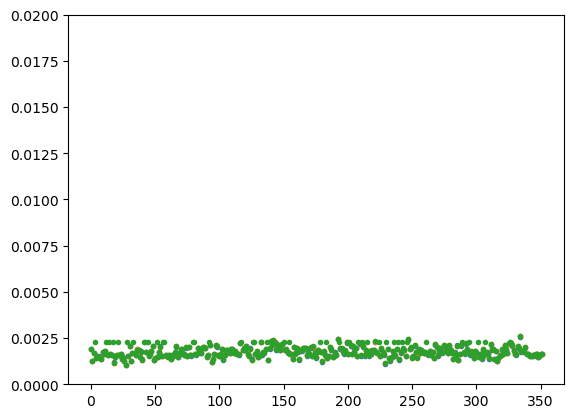

In [46]:
plt.plot(np.abs(uvcal1.gain_array[:, 0, 0, 0]), ".")
plt.plot(np.abs(uvcal2.gain_array[:, 0, 0, 0]), ".")
plt.plot(np.abs(uvcal3.gain_array[:, 0, 0, 0]), ".")
plt.ylim(0,0.02)
plt.show()

In [4]:
cal2 = pyuvdata.UVCal()
cal2.read("/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cygA_point_1freq_1time_inverse_lowtol.calfits")

In [5]:
np.shape(cal1.gain_array)

(352, 1, 1, 2)

In [6]:
np.shape(cal2.gain_array)

(352, 1, 1, 2)

In [7]:
print(np.min([cal1.antenna_names[antind] == cal2.antenna_names[antind] for antind in range(len(cal1.antenna_names))]))

True


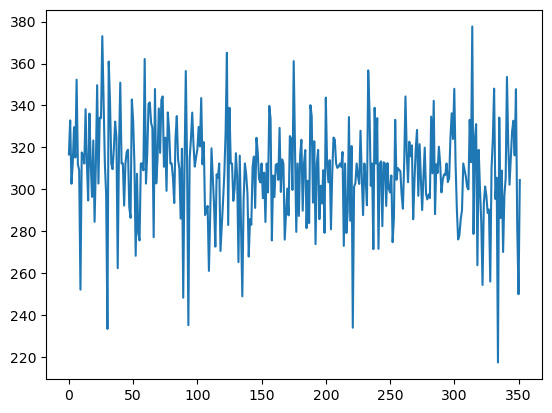

In [8]:
plt.plot(np.abs(cal1.gain_array[:, 0, 0, 0]))

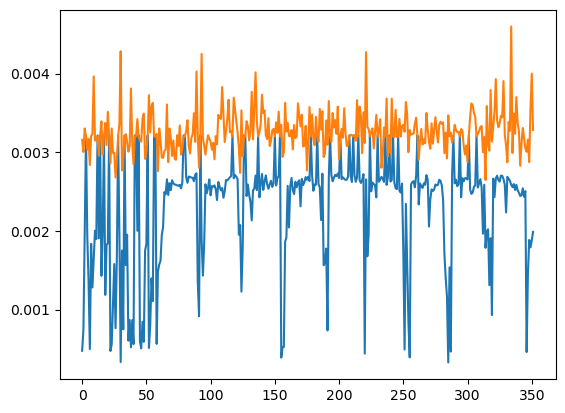

In [9]:
plt.plot(np.abs(cal2.gain_array[:, 0, 0, 0]))
plt.plot(np.abs(1/cal1.gain_array[:, 0, 0, 0]))

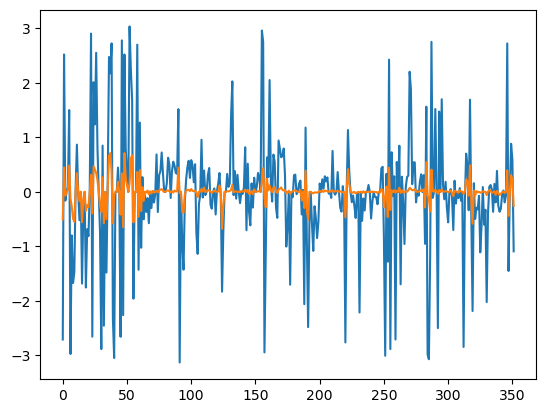

In [10]:
plt.plot(np.angle(cal1.gain_array[:, 0, 0, 0]))
plt.plot(np.angle(1/cal2.gain_array[:, 0, 0, 0]))

In [11]:
datafile = "/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time.ms"
model_file = "/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time_model.ms"
data = pyuvdata.UVData()
data.read(datafile, ignore_single_chan=False)
model = pyuvdata.UVData()
model.read(model_file, ignore_single_chan=False)

The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.


In [22]:
np.shape(cal1.gain_array)

(352, 1, 1, 2)

In [38]:
caldata_obj = caldata.CalData()
caldata_obj.load_data(
    data,
    model,
    gain_init_calfile="/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cygA_point_1freq_1time.calfits",
    gains_multiply_model=False,
    gain_init_stddev=0.0,
    N_feed_pols=None,
    feed_polarization_array=None,
    min_cal_baseline_lambda=10,
    max_cal_baseline_lambda=125,
    lambda_val=0,
)

The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 3667.23052286062 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 3667.23052286062 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 3667.23052286062 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 3667.23052286062 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match

(352, 1, 2)


Cannot reorder the frequency/spw axis with only one frequency and spw. Returning the object unchanged.


In [39]:
cost_function_calculations.cost_function_single_pol(
    caldata_obj.gains[:, 0, 0],
    caldata_obj.model_visibilities[0, :, 0, 0],
    caldata_obj.data_visibilities[0, :, 0, 0],
    caldata_obj.visibility_weights[0, :, 0, 0],
    caldata_obj.gains_exp_mat_1,
    caldata_obj.gains_exp_mat_2,
    caldata_obj.lambda_val,
)

4254817621230.3154

In [40]:
caldata_obj_inverse = caldata.CalData()
caldata_obj_inverse.load_data(
    data,
    model,
    gain_init_calfile="/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cygA_point_1freq_1time_inverse_lowtol.calfits",
    gains_multiply_model=True,
    gain_init_stddev=0.0,
    N_feed_pols=None,
    feed_polarization_array=None,
    min_cal_baseline_lambda=10,
    max_cal_baseline_lambda=125,
    lambda_val=0,
)

The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 3667.23052286062 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 3667.23052286062 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 3667.23052286062 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 3667.23052286062 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match

(352, 1, 2)


Cannot reorder the frequency/spw axis with only one frequency and spw. Returning the object unchanged.


In [42]:
cost_function_calculations.cost_function_single_pol(
    caldata_obj_inverse.gains[:, 0, 0],
    caldata_obj_inverse.data_visibilities[0, :, 0, 0],  # swapped
    caldata_obj_inverse.model_visibilities[0, :, 0, 0],
    caldata_obj_inverse.visibility_weights[0, :, 0, 0],
    caldata_obj_inverse.gains_exp_mat_1,
    caldata_obj_inverse.gains_exp_mat_2,
    caldata_obj_inverse.lambda_val,
)

199.7295713516968

In [43]:
cost_function_calculations.cost_function_single_pol(
    1/caldata_obj.gains[:, 0, 0],
    caldata_obj.data_visibilities[0, :, 0, 0],
    caldata_obj.model_visibilities[0, :, 0, 0],
    caldata_obj.visibility_weights[0, :, 0, 0],
    caldata_obj.gains_exp_mat_1,
    caldata_obj.gains_exp_mat_2,
    caldata_obj.lambda_val,
)

481.0751230025037

In [44]:
cost_function_calculations.cost_function_single_pol(
    1/caldata_obj_inverse.gains[:, 0, 0],
    caldata_obj_inverse.model_visibilities[0, :, 0, 0],
    caldata_obj_inverse.data_visibilities[0, :, 0, 0],
    caldata_obj_inverse.visibility_weights[0, :, 0, 0],
    caldata_obj_inverse.gains_exp_mat_1,
    caldata_obj_inverse.gains_exp_mat_2,
    caldata_obj_inverse.lambda_val,
)

86879187130087.94

In [ ]:
4254817621230.3154
86879187130087.94

In [15]:
uvcal_example = caldata_obj.convert_to_uvcal()

In [45]:
uvcal = calibration_wrappers.calibration_per_pol_wrapper(
    datafile,
    model_file,
    data_use_column="DATA",
    model_use_column="DATA",
    conjugate_model=False,
    min_cal_baseline_lambda=10,
    max_cal_baseline_lambda=125,
    gains_multiply_model=True,
    verbose=True,
    get_crosspol_phase=False,
    log_file_path=f"/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cal_log_cygA_1freq_1time_inverse.txt",
    xtol=1e-10,  # reduce for inverse gains
    maxiter=100,  # reduce maxiter for debugging
    antenna_flagging_iterations=0,
)

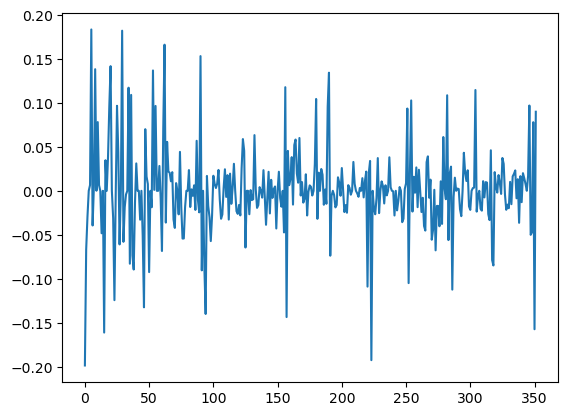

In [46]:
plt.plot(np.angle(uvcal.gain_array[:, 0, 0, 0]))

In [47]:
uvcal.write_calfits(
    f"/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cygA_point_1freq_1time_inverse_debug_run.calfits",
    clobber=True,
)

In [49]:
data_calibrated = pyuvdata.utils.uvcalibrate(data, uvcal, inplace=False, time_check=False)
data_calibrated.reorder_pols(order="CASA")
data_calibrated.write_ms(
    f"/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cygA_point_1freq_1time_inverse_debug_calibration.ms",
    fix_autos=True,
    clobber=True,
)

In [20]:
uvcal_gains_multiply_data = calibration_wrappers.calibration_per_pol_wrapper(
    datafile,
    model_file,
    data_use_column="DATA",
    model_use_column="DATA",
    conjugate_model=False,
    min_cal_baseline_lambda=10,
    max_cal_baseline_lambda=125,
    gains_multiply_model=False,
    verbose=True,
    get_crosspol_phase=False,
    log_file_path=f"/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cal_log_cygA_1freq_1time.txt",
    xtol=1e-10,  # reduce for inverse gains
    maxiter=100,  # reduce maxiter for debugging
    antenna_flagging_iterations=0,
)

In [21]:
data_calibrated2 = pyuvdata.utils.uvcalibrate(data, uvcal_gains_multiply_data, inplace=False, time_check=False)
data_calibrated2.reorder_pols(order="CASA")
data_calibrated2.write_ms(
    f"/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cygA_point_1freq_1time_debug_calibration.ms",
    fix_autos=True,
    clobber=True,
)

gain_scale is not set, so there is no way to know what the resulting units are. For now, we assume that `gain_scale` matches whatever is on the UVData object (i.e. we do not change its units). Furthermore, all corrections concerning the pol_convention will be ignored.
pol_convention is not specified on the UVCal object, and uvc_pol_convention was not specified. Tentatively assuming that the UVCal and UVData objects (implicitly) have the same convention.
Neither uvd_pol_convention nor uvc_pol_convention are specified, so the resulting UVData object will have ambiguous convention. 
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
UVData object does not have `x_orientation` specified but UVCal does. Matching based on `x` and `y` only 
The uvw_array does not match the expected values given the ant

In [27]:
uvcal_identical_data = calibration_wrappers.calibration_per_pol_wrapper(
    data,
    data_calibrated2,
    conjugate_model=False,
    min_cal_baseline_lambda=10,
    max_cal_baseline_lambda=125,
    gains_multiply_model=True,
    verbose=True,
    get_crosspol_phase=False,
    log_file_path=f"/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cal_log_debug.txt",
    xtol=1e-10,  # reduce for inverse gains
    maxiter=2,  # reduce maxiter for debugging
    antenna_flagging_iterations=0,
    gain_init_stddev=0.1,
)

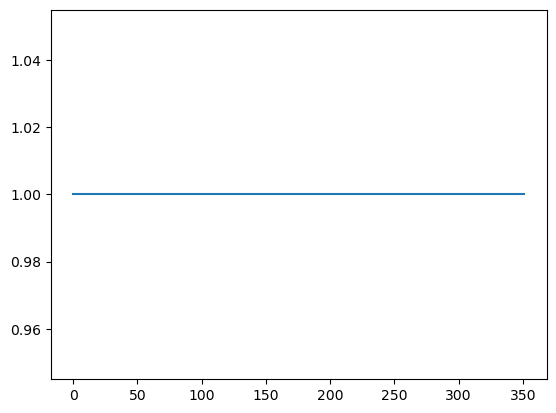

In [30]:
plt.plot(np.abs(uvcal_identical_data.gain_array[:, 0, 0, 1]))

In [ ]:
datafile = "/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time.ms"
model_file = "/lustre/rbyrne/2024-03-02/ruby/18_1freq_1time_model.ms"
data = pyuvdata.UVData()
data.read(datafile, ignore_single_chan=False)
model = pyuvdata.UVData()
model.read(model_file, ignore_single_chan=False)

In [14]:
caldata_obj = caldata.CalData()
caldata_obj.load_data(
    data,
    model,
)

The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does n

In [17]:
uvcal_example.gain_array /= 286.68059411

In [20]:
np.shape(uvcal_example.gain_array)

(352, 1, 1, 2)

In [21]:
gain_init_stddev = 0.01
uvcal_example.gain_array[:, 0, :, :] += np.random.normal(
    0.0,
    gain_init_stddev,
    size=(
        caldata_obj.Nants,
        caldata_obj.Nfreqs,
        caldata_obj.N_feed_pols,
    ),
) + 1.0j * np.random.normal(
    0.0,
    gain_init_stddev,
    size=(
        caldata_obj.Nants,
        caldata_obj.Nfreqs,
        caldata_obj.N_feed_pols,
    ),
)

In [22]:
uvcal_example.gain_array

array([[[[1.01481687-4.73565927e-03j, 1.00840928+1.51610356e-03j]]],


       [[[1.00670332-4.92420913e-03j, 1.00043498+8.11495527e-03j]]],


       [[[0.99693694-1.50865412e-02j, 1.00375536-1.45897246e-03j]]],


       [[[1.01833405+7.38717824e-04j, 1.00733888+4.36034322e-03j]]],


       [[[0.99537836-1.16418781e-02j, 1.0070082 +1.22481181e-02j]]],


       [[[0.98059047-1.74889268e-03j, 0.9788902 +1.28287013e-02j]]],


       [[[0.9894976 -1.16121854e-02j, 1.0115727 +5.89316648e-03j]]],


       [[[0.97388336+9.02102332e-03j, 0.98605858+1.94685810e-02j]]],


       [[[1.01072623+1.62489225e-03j, 1.00156931-4.66105920e-03j]]],


       [[[1.01144405+3.33203473e-03j, 0.99514086+1.08496338e-03j]]],


       [[[1.00007655+5.57500090e-03j, 1.01880568-7.28082964e-03j]]],


       [[[1.00210901+9.93613193e-03j, 0.99324376-3.46154972e-02j]]],


       [[[1.01079906+5.29819560e-04j, 1.00648408+1.10220798e-02j]]],


       [[[1.01944221-4.15259503e-03j, 1.01486815+6.99717158e-03j]]],


      

In [23]:
data_perturbed = pyuvdata.utils.uvcalibrate(data, uvcal_example, inplace=False, time_check=False)

gain_scale is not set, so there is no way to know what the resulting units are. For now, we assume that `gain_scale` matches whatever is on the UVData object (i.e. we do not change its units). Furthermore, all corrections concerning the pol_convention will be ignored.
pol_convention is not specified on the UVCal object, and uvc_pol_convention was not specified. Tentatively assuming that the UVCal and UVData objects (implicitly) have the same convention.
Neither uvd_pol_convention nor uvc_pol_convention are specified, so the resulting UVData object will have ambiguous convention. 
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.4478423902415 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
UVData object does not have `x_orientation` specified but UVCal does. Matching based on `x` and `y` only 


In [24]:
uvcal_identical_data = calibration_wrappers.calibration_per_pol_wrapper(
    data,
    data_perturbed,
    conjugate_model=False,
    min_cal_baseline_lambda=10,
    max_cal_baseline_lambda=125,
    gains_multiply_model=False,
    verbose=True,
    get_crosspol_phase=False,
    log_file_path=f"/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cal_log_debug.txt",
    xtol=1e-10,  # reduce for inverse gains
    maxiter=10,  # reduce maxiter for debugging
    antenna_flagging_iterations=0,
    gain_init_stddev=0,
)

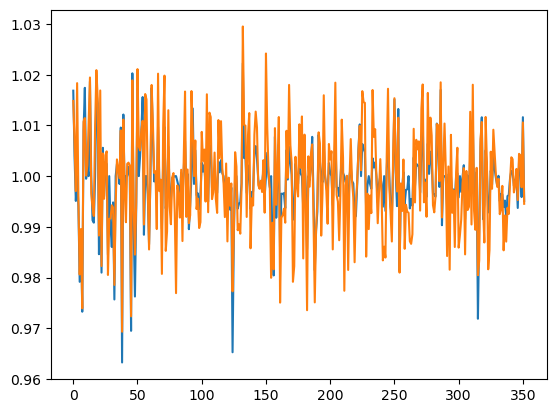

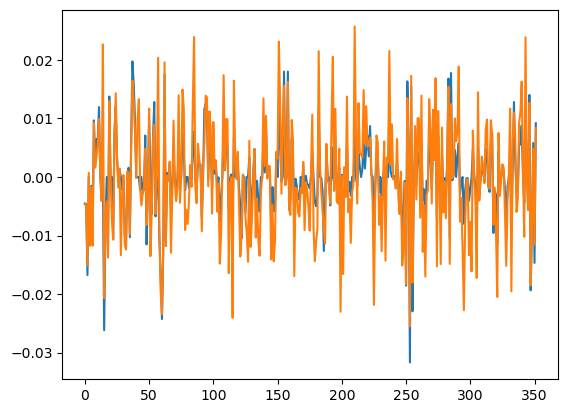

In [28]:
plt.plot(np.abs(uvcal_identical_data.gain_array[:, 0, 0, 0]))
plt.plot(np.abs(uvcal_example.gain_array[:, 0, 0, 0]))
plt.show()

plt.plot(np.angle(uvcal_identical_data.gain_array[:, 0, 0, 0]))
plt.plot(np.angle(uvcal_example.gain_array[:, 0, 0, 0]))
plt.show()

In [29]:
uvcal_identical_data_inverse = calibration_wrappers.calibration_per_pol_wrapper(
    data,
    data_perturbed,
    conjugate_model=False,
    min_cal_baseline_lambda=10,
    max_cal_baseline_lambda=125,
    gains_multiply_model=True,
    verbose=True,
    get_crosspol_phase=False,
    log_file_path=f"/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cal_log_debug.txt",
    xtol=1e-10,  # reduce for inverse gains
    maxiter=10,  # reduce maxiter for debugging
    antenna_flagging_iterations=0,
    gain_init_stddev=0,
)

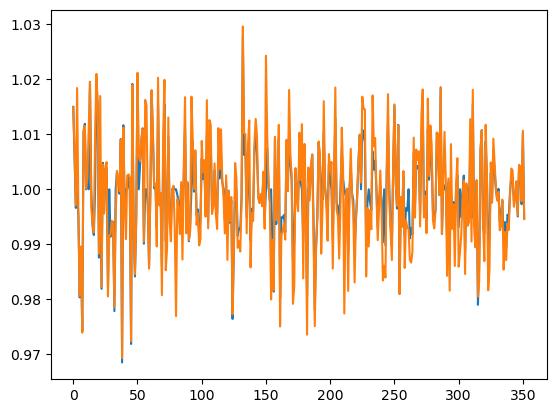

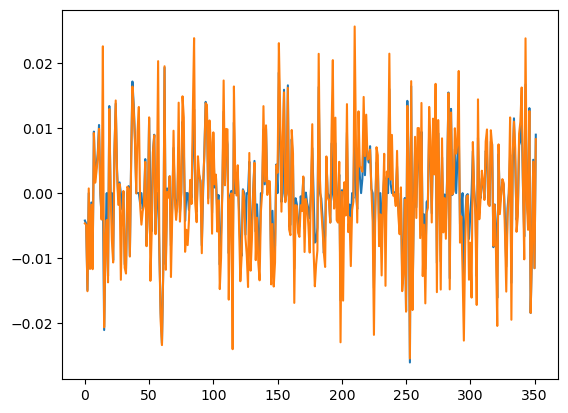

In [31]:
plt.plot(np.abs(1/uvcal_identical_data_inverse.gain_array[:, 0, 0, 0]))
plt.plot(np.abs(uvcal_example.gain_array[:, 0, 0, 0]))
plt.show()

plt.plot(np.angle(1/uvcal_identical_data_inverse.gain_array[:, 0, 0, 0]))
plt.plot(np.angle(uvcal_example.gain_array[:, 0, 0, 0]))
plt.show()

In [52]:
data.data_array

array([[[ 2.2459425e+01+0.0000000e+00j,  2.0135141e+01+0.0000000e+00j,
         -3.5435835e-01-1.8932916e-01j, -3.5435835e-01+1.8932916e-01j]],

       [[ 4.6045832e-02-5.3029168e-02j,  8.1308335e-02-6.2258333e-02j,
         -4.9124998e-03+2.6170833e-02j,  2.3212500e-02+1.8333334e-04j]],

       [[-8.3495833e-02+9.8754168e-02j, -7.2350003e-02+1.0481667e-01j,
         -5.6037501e-02-3.0375000e-02j, -3.9562501e-02-7.4658334e-02j]],

       ...,

       [[ 3.4888268e+01+0.0000000e+00j,  2.5175495e+01+0.0000000e+00j,
         -2.6750001e-01-1.5635417e-01j, -2.6750001e-01+1.5635417e-01j]],

       [[ 1.0055000e-01+2.4295833e-02j, -2.8545834e-02+9.5270835e-02j,
         -6.3083336e-02-1.0075000e-02j, -4.3495834e-02+4.9737498e-02j]],

       [[ 2.2894899e+01+0.0000000e+00j,  2.1111845e+01+0.0000000e+00j,
         -1.2537083e-01-2.4156667e-01j, -1.2537083e-01+2.4156667e-01j]]],
      dtype=complex64)

In [53]:
use_data = data.copy()
vis_stddev = 1.
use_data.data_array += np.random.normal(
    0.0,
    gain_init_stddev,
    size=np.shape(data.data_array),
) + 1.0j * np.random.normal(
    0.0,
    gain_init_stddev,
    size=np.shape(data.data_array),
)

In [54]:
uvcal_noisy_data = calibration_wrappers.calibration_per_pol_wrapper(
    use_data,
    data_perturbed,
    conjugate_model=False,
    min_cal_baseline_lambda=10,
    max_cal_baseline_lambda=125,
    gains_multiply_model=False,
    verbose=True,
    get_crosspol_phase=False,
    log_file_path=f"/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cal_log_debug.txt",
    xtol=1e-10,  # reduce for inverse gains
    maxiter=10,  # reduce maxiter for debugging
    antenna_flagging_iterations=0,
    gain_init_stddev=0,
)

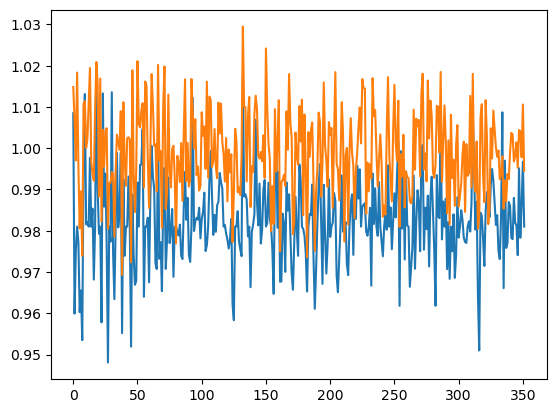

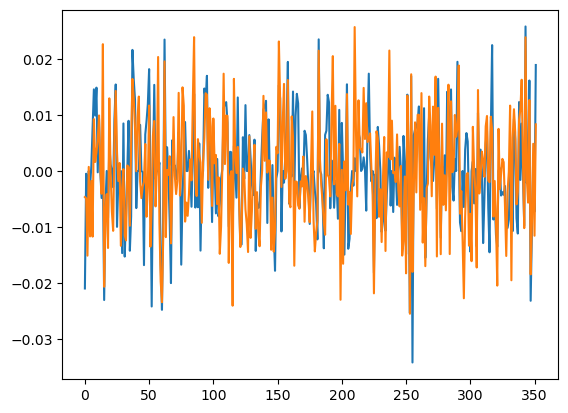

In [58]:
plt.plot(np.abs(uvcal_noisy_data.gain_array[:, 0, 0, 0]))
plt.plot(np.abs(uvcal_example.gain_array[:, 0, 0, 0]))
plt.show()

plt.plot(np.angle(uvcal_noisy_data.gain_array[:, 0, 0, 0]))
plt.plot(np.angle(uvcal_example.gain_array[:, 0, 0, 0]))
plt.show()

In [59]:
uvcal_noisy_data_inverse = calibration_wrappers.calibration_per_pol_wrapper(
    use_data,
    data_perturbed,
    conjugate_model=False,
    min_cal_baseline_lambda=10,
    max_cal_baseline_lambda=125,
    gains_multiply_model=True,
    verbose=True,
    get_crosspol_phase=False,
    log_file_path=f"/lustre/rbyrne/2024-03-02/ruby/calibration_outputs/18_cal_log_debug.txt",
    xtol=1e-10,  # reduce for inverse gains
    maxiter=10,  # reduce maxiter for debugging
    antenna_flagging_iterations=0,
    gain_init_stddev=0,
)

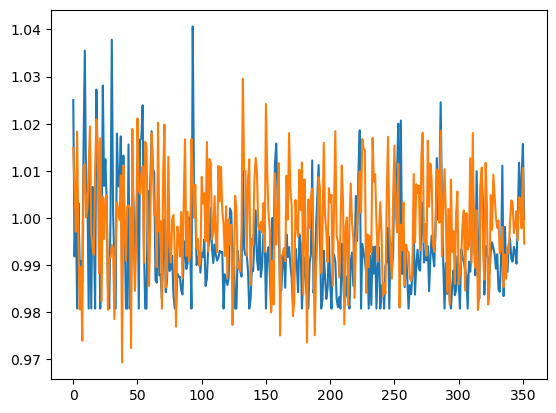

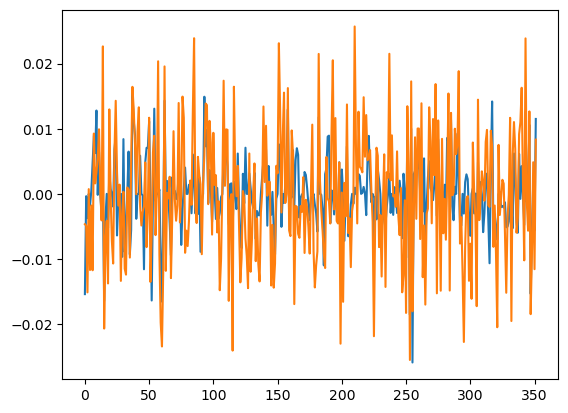

In [63]:
plt.plot(np.abs(1/uvcal_noisy_data_inverse.gain_array[:, 0, 0, 0]))
plt.plot(np.abs(uvcal_example.gain_array[:, 0, 0, 0]))
plt.show()

plt.plot(np.angle(1/uvcal_noisy_data_inverse.gain_array[:, 0, 0, 0]))
plt.plot(np.angle(uvcal_example.gain_array[:, 0, 0, 0]))
plt.show()

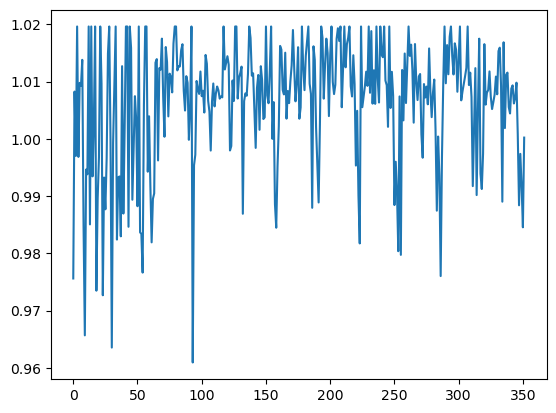

In [64]:
plt.plot(np.abs(uvcal_noisy_data_inverse.gain_array[:, 0, 0, 0]))
plt.show()